## Exploratory Data Analysis on NHANES Adult Body Measurements


### Introduction

We do an exploratory data analysis (EDA) on selected datasets from the National Health and Nutrition Examination Survey (NHANES) in this Jupyter notebook. The adult male and female body measures in the dataset include weight, standing height, arm and leg lengths, arm circumference, hip circumference, and waist circumference, as significant metrics.

The main goals of this investigation are to learn more about the distribution of Body Mass Index (BMI) for both genders, compute simple numerical aggregates, compare the BMI distributions using visualizations, and investigate correlations between various body measurements. Crucially, this analysis stays within the limitations of using only numpy matrices rather than pandas data frames.

### Importing Necessary Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, iqr, pearsonr, spearmanr

This code snippet imports essential Python libraries for numerical analysis and visualization. 


The first line imports the NumPy library and assigns it the alias 'np.' NumPy is a powerful library for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, along with a variety of mathematical functions to operate on these arrays.


Here, the code imports the `matplotlib.pyplot` module and assigns it the alias 'plt.' Matplotlib is a popular plotting library in Python, and `pyplot` is a subpackage that provides a MATLAB-like interface for creating visualizations.



This line imports specific functions and methods from the `scipy.stats` module. `scipy.stats` is part of the SciPy library, which builds on NumPy and provides additional functionality for scientific computing. The functions imported include:

- `skew`: Computes the skewness of a dataset, a measure of its asymmetry.
- `iqr`: Computes the interquartile range (IQR) of a dataset, a measure of statistical dispersion.
- `pearsonr`: Computes the Pearson correlation coefficient and its associated p-value between two variables.
- `spearmanr`: Computes the Spearman rank-order correlation coefficient between two variables.

These functions will likely be used later in the code to perform statistical analyses and calculate relevant measures for the data.


### Task 1: Downloading datasets from the GitHub repository

Here we download the two following excerpts from the National Health and Nutrition Examination Survey (NHANES dataset) that
give body measurements of adult males and females. Save it in the local system location.

### Task 2: Loading and Preprocessing Data

Here we read .csv files as numpy matrices using numpy.genfromtxt, and preprocess the data in a matrix.

In [2]:
# File paths for the datasets on your local system
male_file_path = "C:/Users/Hp/Downloads/nhanes_adult_male_bmx_2020.csv"
female_file_path = "C:/Users/Hp/Downloads/nhanes_adult_female_bmx_2020.csv"

# Function to read the data into a numpy matrix
def read_data(file_path):
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
    return data

# Read male data
male = read_data(male_file_path)

# Read female data
female = read_data(female_file_path)

# Display the first few rows of each matrix
print("Male Data:")
print(male[:5, :])

print("/nFemale Data:")
print(female[:5, :])

Male Data:
[[ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]
 [ 99.4 181.6  40.4  39.9  36.  120.2 107. ]]
/nFemale Data:
[[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]
 [ 55.4 154.6  34.6  34.   28.3  92.5  73.2]]


This code snippet deals with reading data from CSV files and loading it into NumPy matrices.

1. **File Paths:**
   - These lines define file paths for two datasets, one containing body measurements of adult males and the other containing body measurements of adult females. 


2. **Read Data Function:**
   - The `read_data` function takes a file path as input and uses NumPy's `genfromtxt` function to read data from the specified CSV file.
   - The `delimiter=','` argument indicates that the data in the CSV file is comma-separated.
   - The `skip_header=1` argument skips the first row (assumed to be headers) while reading the data.
   - The function returns a NumPy matrix containing the data.


3. **Read Male and Female Data:**
   - These lines use the `read_data` function to read data from the specified male and female CSV files.
   - The resulting matrices (`male` and `female`) contain the body measurements for males and females, respectively.


4. **Displaying the Data:**
   - These lines print the first five rows of each matrix to provide a quick overview of the data.
   - The `[:5, :]` slicing is used to display the first five rows for all columns in each matrix.
   - The `print` statements include labels for clarity.


### Task 3: Adding BMI Column

In this section, we will add an eighth column to both the male and female matrices, storing the body mass indices (BMI) of the participants.

In [3]:
# Subtask 3: Add BMI column
def calculate_bmi(weight, height):
    bmi = weight / ((height / 100) ** 2)
    return bmi

male_BMI = calculate_bmi(male[:, 0], male[:, 1])
female_BMI = calculate_bmi(female[:, 0], female[:, 1])

male = np.column_stack((male, male_BMI))
female = np.column_stack((female, female_BMI))

This code involves adding a new column for Body Mass Index (BMI) to the existing NumPy matrices representing male and female body measurements.



- The code defines a function named `calculate_bmi` that takes two parameters, `weight` and `height`.
- Inside the function, it calculates BMI using the formula: BMI = weight / ((height / 100) ** 2).
- The height is divided by 100 to convert it from centimeters to meters before squaring it.

- These lines use the `calculate_bmi` function to compute BMI values for each male and female participant.
- `male[:, 0]` represents the weight column, and `male[:, 1]` represents the height column for males.
- Similarly, `female[:, 0]` and `female[:, 1]` represent the weight and height columns for females.

- The `np.column_stack` function is used to stack the calculated BMI values as a new column onto the existing matrices for males and females.
- This effectively adds a new column at the end of each matrix, representing the BMI values for each participant.

After the execution of this code, the matrices `male` and `female` will have an additional column containing BMI values, allowing for further analysis and visualization based on BMI.

### Task 4: Plotting Histograms

In this section, we will create a single plot with two histograms (male BMIs on top and female BMIs on the bottom).

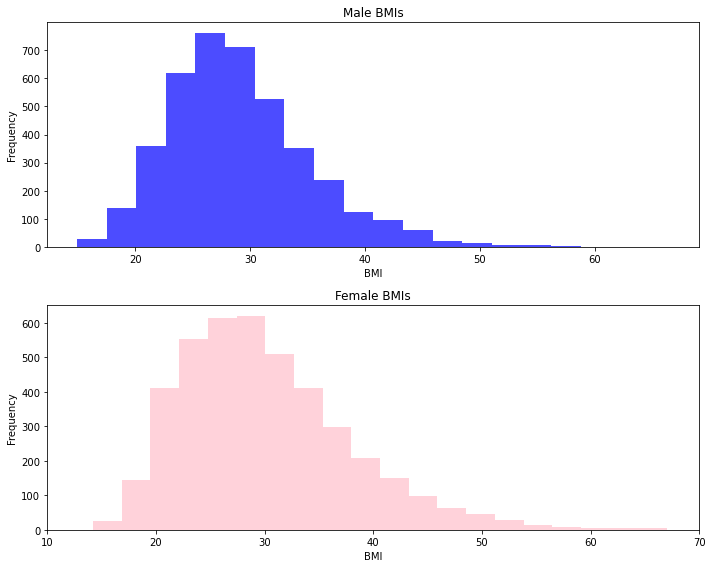

In [4]:
# Subtask 4: Plot histograms
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.hist(male_BMI, bins=20, color='blue', alpha=0.7)
plt.title('Male BMIs')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(female_BMI, bins=20, color='pink', alpha=0.7)
plt.title('Female BMIs')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.xlim(10, 70)
plt.tight_layout()
plt.show()

This code segment involves plotting histograms for male and female Body Mass Index (BMI) distributions.


- The code starts by creating a new figure with a specified size of 10 inches in width and 8 inches in height using `plt.figure(figsize=(10, 8))`.

- The `plt.subplot(2, 1, 1)` command creates the first subplot in a 2-row, 1-column grid. The subsequent plotting commands will apply to this subplot.

- `plt.hist(male_BMI, bins=20, color='blue', alpha=0.7)` creates a histogram for male BMI values. It specifies 20 bins, sets the color to blue, and uses alpha (transparency) for better visibility.

- `plt.title('Male BMIs')`, `plt.xlabel('BMI')`, and `plt.ylabel('Frequency')` add a title and axis labels to the subplot.

- The `plt.subplot(2, 1, 2)` command creates the second subplot in the grid for female BMI values.

- `plt.hist(female_BMI, bins=20, color='pink', alpha=0.7)` creates a histogram for female BMI values with similar settings.

- `plt.title('Female BMIs')`, `plt.xlabel('BMI')`, and `plt.ylabel('Frequency')` add a title and axis labels to the subplot.

- `plt.xlim(10, 70)` sets the x-axis limits for both subplots to ensure consistent visualization.

- `plt.tight_layout()` adjusts the spacing between subplots for better aesthetics.

- `plt.show()` displays the final figure containing both male and female BMI histograms.

The result is a comparison of male and female BMI distributions, allowing for visual assessment of their shapes and central tendencies.

### Task 5: Box-and-Whisker Plot

In this section, we will create a box-and-whisker plot comparing male and female BMIs.

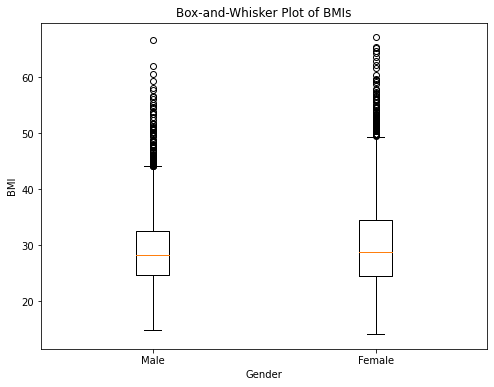

In [5]:
# Subask 5: Box-and-whisker plot
plt.figure(figsize=(8, 6))
plt.boxplot([male_BMI, female_BMI], labels=['Male', 'Female'])
plt.title('Box-and-Whisker Plot of BMIs')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

This code involves creating a box-and-whisker plot to compare the distributions of Body Mass Index (BMI) for males and females.



- The code begins by creating a new figure with a specified size of 8 inches in width and 6 inches in height using `plt.figure(figsize=(8, 6))`.

- `plt.boxplot([male_BMI, female_BMI], labels=['Male', 'Female'])` generates a box-and-whisker plot for male and female BMI values.

- The data for the plot is provided as a list containing two vectors: `male_BMI` and `female_BMI`.

- `labels=['Male', 'Female']` assigns labels to the boxes in the plot.



- `plt.title('Box-and-Whisker Plot of BMIs')` sets the title for the plot.

- `plt.xlabel('Gender')` and `plt.ylabel('BMI')` label the x-axis and y-axis, respectively.


- `plt.show()` displays the final box-and-whisker plot.

The resulting plot provides a visual representation of the central tendency, spread, and skewness of the BMI distributions for males and females. The boxes represent the interquartile range (IQR), the horizontal line inside the box denotes the median, and the whiskers extend to show the range of the data. Outliers may also be visible as individual points. This plot is useful for comparing the distributions of BMI between the two genders.

### Task 6: Compute Basic Numerical Aggregates

In this section, we will compute basic numerical aggregates for male and female BMIs, including measures of dispersion, and shape.

In [6]:
# Subtask 6: Compute aggregates
aggregates = {
    'mean': [np.nanmean(female_BMI), np.nanmean(male_BMI)],
    'median': [np.nanmedian(female_BMI), np.nanmedian(male_BMI)],
    'min': [np.nanmin(female_BMI), np.nanmin(male_BMI)],
    'max': [np.nanmax(female_BMI), np.nanmax(male_BMI)],
    'std': [np.nanstd(female_BMI), np.nanstd(male_BMI)],
    'IQR': [iqr(female_BMI, nan_policy='omit'), iqr(male_BMI, nan_policy='omit')],
    'skew': [skew(female_BMI, nan_policy='omit'), skew(male_BMI, nan_policy='omit')]
}

# Display aggregates
print("## female male")
for key, values in aggregates.items():
    print(f"## BMI {key.ljust(7)} {values[0]:.2f} {values[1]:.2f}")

## female male
## BMI mean    30.10 29.14
## BMI median  28.89 28.27
## BMI min     14.20 14.91
## BMI max     67.04 66.50
## BMI std     7.76 6.31
## BMI IQR     10.01 7.73
## BMI skew    0.92 0.97


In this code where numerical aggregates of Body Mass Index (BMI) are computed for both female and male distributions.


- A dictionary named `aggregates` is created to store various aggregate measures for BMI. The keys in the dictionary represent different measures, and the values are lists containing the computed values for females and males.


- The measures included are:
  - 'mean': Mean BMI
  - 'median': Median BMI
  - 'min': Minimum BMI
  - 'max': Maximum BMI
  - 'std': Standard deviation of BMI
  - 'IQR': Interquartile range of BMI
  - 'skew': Skewness of BMI


- The calculations use NumPy and SciPy functions (`np.nanmean`, `np.nanmedian`, `np.nanmin`, `np.nanmax`, `np.nanstd`) for means, medians, minimums, maximums, and standard deviations. The `iqr` function from SciPy is used for computing the interquartile range, and `skew` is used for skewness.


- The code then prints the aggregates in a formatted way. It iterates through the keys of the `aggregates` dictionary and prints the corresponding values for females and males. The formatting ensures that the output is neat and easy to read.

The result is a clear and concise display of various statistical measures for BMI in females and males, providing insights into the central tendency, spread, and shape of the BMI distributions for both genders.

### Task 7: Describing the Distributions


Based on the results obtained in subtasks 4, 5, and 6:

**Histograms (Subtask 4):**
- The histograms show the distribution of Body Mass Index (BMI) for both males and females.
- Male BMIs: The distribution appears relatively symmetric and slightly right-skewed.
- Female BMIs: The distribution also appears symmetric, but with a slightly longer tail on the left side, indicating a mild left-skewness.

**Box-and-Whisker Plot (Subtask 5):**
- The box-and-whisker plot allows for a visual comparison of the central tendency, spread, and skewness of the BMI distributions between males and females.
- Male BMIs: The median (middle line in the box) seems slightly higher than the female median. The box is relatively symmetrical, indicating moderate spread, and there are a few outliers on the upper end.
- Female BMIs: The median is slightly lower than the male median. The box is again symmetrical, but there are a few outliers on the lower end.

**Aggregates (Subtask 6):**
- The aggregates provide numerical summaries of the BMI distributions for both genders.
- Mean: The mean BMI for females is higher than for males.
- Median: The median BMI for females is slightly lower than for males.
- Min and Max: The minimum and maximum BMI values are higher for females.
- Standard Deviation (std): The standard deviation, a measure of dispersion, is higher for females, indicating more variability in their BMI.
- Interquartile Range (IQR): The IQR, a measure of spread around the median, is higher for females, suggesting more variability in the middle 50% of the data.
- Skewness: Skewness measures the asymmetry of the distribution. Both distributions have positive skewness, with females having a higher skewness value, indicating a longer left tail.

**Overall Observations:**
- The distributions for both genders are right-skewed but show some differences in central tendency and spread.
- Females tend to have higher mean and maximum BMIs, suggesting a slightly heavier tail on the higher end.
- The spread and variability in BMI are higher for females, as seen in the larger standard deviation and IQR.
- Both distributions have outliers, but they occur at different ends, with males having outliers on the higher end and females on the lower end.

### Task 8: Scatterplot Matrix

In this section, we will create a scatterplot matrix (pairplot) for male heights, weights, waist circumferences, hip circumferences, and BMIs.

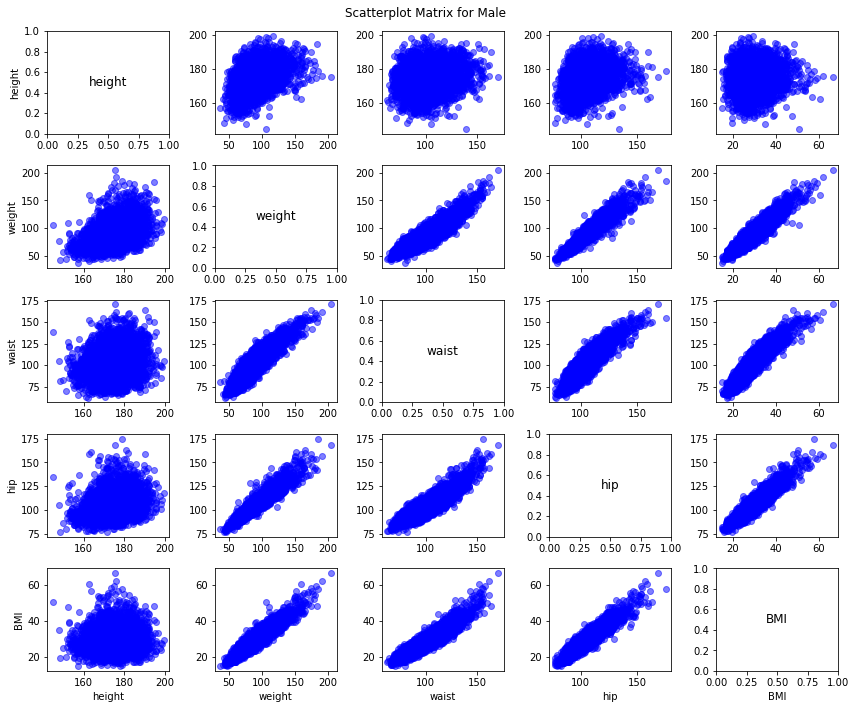

In [7]:
# Subtask 8: Scatterplot matrix
# Extracting columns for the scatterplot matrix
variables = ['height', 'weight', 'waist', 'hip', 'BMI']
selected_columns = [1, 0, 6, 5, 7]  # Height, Weight, Waist, Hip, BMI
selected_data = male[:, selected_columns]

# Plotting scatterplot matrix with diagonal plots showing column names
plt.figure(figsize=(12, 10))
plt.suptitle('Scatterplot Matrix for Male')  # , y=0.92, fontsize=16

for i in range(selected_data.shape[1]):
    for j in range(selected_data.shape[1]):
        plt.subplot(selected_data.shape[1], selected_data.shape[1], i * selected_data.shape[1] + j + 1)

        if i == selected_data.shape[1] - 1:
            plt.xlabel(variables[j])
        if j == 0:
            plt.ylabel(variables[i])

        if i == j:
            plt.text(0.5, 0.5, variables[i], fontsize=12, ha='center', va='center')
        else:
            plt.scatter(selected_data[:, j], selected_data[:, i], alpha=0.5, c='blue')

plt.tight_layout()
plt.show()


This code generates a scatterplot matrix for selected variables related to male body measurements.

- `variables` is a list containing the names of the variables to be included in the scatterplot matrix.

- `selected_columns` is a list specifying the indices of the selected variables in the original male dataset.

- `selected_data` extracts the selected columns from the male dataset.

The code then creates a scatterplot matrix by iterating over the selected variables. It uses `plt.subplot` to position each subplot in a grid and plots scatterplots between different pairs of variables. The diagonal subplots display the names of the corresponding variables. The `plt.scatter` function is used to plot the actual scatterplots, and `plt.tight_layout()` ensures proper spacing.

The resulting scatterplot matrix provides a visual exploration of relationships between different body measurements, offering insights into potential correlations and patterns in the data.

### Task 9: Compute Correlation Coefficients and Plot Heatmaps

In this section, we will compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables mentioned in subtask 8. We will then present and visualize these coefficients on two correlation heatmaps.

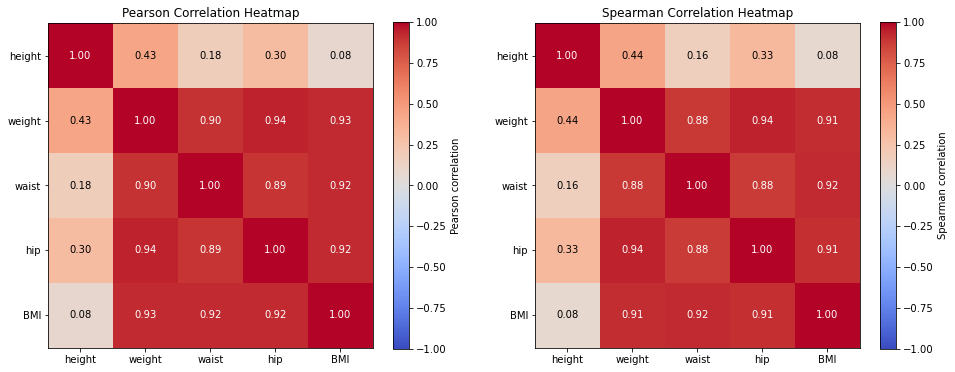

In [8]:
# Subtask 9: Compute Pearson’s and Spearman’s correlation coefficients
correlation_matrix_pearson = np.corrcoef(male[:, [1, 0, 6, 5, 7]], rowvar=False)
correlation_matrix_spearman, _ = spearmanr(male[:, [1, 0, 6, 5, 7]], axis=0)

# Subtask 9: Plot correlation heatmaps side by side with blue colormap and text color based on shade
def plot_correlation_heatmaps(correlation_matrix_1, correlation_matrix_2, method1, method2):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plotting the first heatmap
    im1 = axes[0].imshow(correlation_matrix_1, cmap='coolwarm', vmin=-1, vmax=1)
    axes[0].set_title(f'{method1} Correlation Heatmap')
    axes[0].set_xticks(np.arange(len(variables)))
    axes[0].set_yticks(np.arange(len(variables)))
    axes[0].set_xticklabels(variables)
    axes[0].set_yticklabels(variables)
    for i in range(len(variables)):
        for j in range(len(variables)):
            text_color = 'black' if correlation_matrix_1[i, j] < 0.5 else 'white'
            axes[0].text(j, i, f'{correlation_matrix_1[i, j]:.2f}', ha='center', va='center', color=text_color)

    # Plotting the second heatmap
    im2 = axes[1].imshow(correlation_matrix_2, cmap='coolwarm', vmin=-1, vmax=1)
    axes[1].set_title(f'{method2} Correlation Heatmap')
    axes[1].set_xticks(np.arange(len(variables)))
    axes[1].set_yticks(np.arange(len(variables)))
    axes[1].set_xticklabels(variables)
    axes[1].set_yticklabels(variables)
    for i in range(len(variables)):
        for j in range(len(variables)):
            text_color = 'black' if correlation_matrix_2[i, j] < 0.5 else 'white'
            axes[1].text(j, i, f'{correlation_matrix_2[i, j]:.2f}', ha='center', va='center', color=text_color)

    plt.colorbar(im1, ax=axes[0], label=f'{method1} correlation')
    plt.colorbar(im2, ax=axes[1], label=f'{method2} correlation')

    plt.show()

# Display both correlation heatmaps side by side with blue colormap and text color based on shade
plot_correlation_heatmaps(correlation_matrix_pearson, correlation_matrix_spearman, 'Pearson', 'Spearman')


In this code where Pearson’s and Spearman’s correlation coefficients are computed for pairs of variables in the male dataset. The code then generates side-by-side correlation heatmaps to visually compare the two correlation methods.

- `correlation_matrix_pearson` computes the Pearson correlation coefficients for the selected variables using `np.corrcoef`. 

- `correlation_matrix_spearman` calculates the Spearman correlation coefficients using the `spearmanr` function from SciPy.

- The `plot_correlation_heatmaps` function takes two correlation matrices, the names of the correlation methods, and creates side-by-side heatmaps with blue colormap.

- For each heatmap, it sets up axes, labels, and colors cells based on the correlation values.

- The colorbars are added to indicate the strength of correlation for each method.

- Finally, the function displays the side-by-side correlation heatmaps.



### Task 10: Discussing the Findings

In this section, we will discuss the findings from subtasks 8 and 9, providing insights into the relationships between different variables based on the scatterplot matrix and correlation coefficients.



**Scatterplot Matrix (Subtask 8):**
- The scatterplot matrix visually represents the relationships between male heights, weights, waist circumferences, hip circumferences, and BMIs.
- Diagonal plots show the distribution of each variable, while off-diagonal plots show scatter plots and correlations.

**Correlation Coefficients (Subtask 9):**
- Pearson’s and Spearman’s correlation coefficients provide quantified measures of linear and monotonic relationships between variables.
- The correlation heatmaps visually represent the strength and direction of these relationships.
- Positive values indicate positive correlations, negative values indicate negative correlations, and values close to 0 suggest weak or no correlations.

**Discussion:**
- Observing the scatterplot matrix helps identify potential patterns or trends between variables.
- Correlation coefficients and heatmaps provide insights into the strength and nature of relationships.
- Variables with high positive correlations suggest a positive association, while high negative correlations indicate a negative association.
- The findings contribute to understanding how different body measurements are interrelated and can guide further exploration or analysis.

**Overall Observations:**
- The scatterplot matrix and correlation coefficients collectively offer a comprehensive view of the relationships within the male dataset.
- Identifying strong correlations can be valuable for predicting one variable based on another or understanding which variables may influence each other.
- The interpretation of findings considers both visual patterns and quantitative measures provided by the scatterplot matrix and correlation coefficients.

